<a href="https://colab.research.google.com/github/snimale/ML-Learning/blob/master/KNN_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Data Analysis & Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/glass.csv")
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<Axes: >

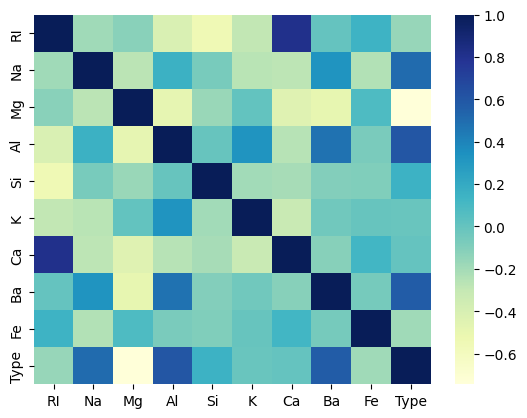

In [4]:
import seaborn as sns
sns.heatmap(df.corr(), cmap="YlGnBu")

<Axes: xlabel='Type', ylabel='Count'>

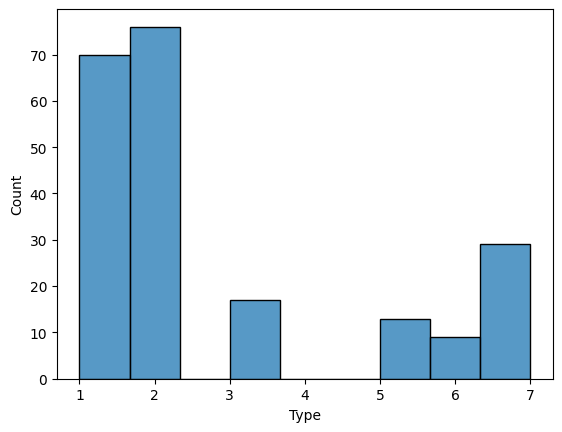

In [8]:
sns.histplot(x="Type", data=df)

In [9]:
df['RI'].mean()

1.5183654205607477

In [10]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df.shape

(214, 10)

In [13]:
df.std()

RI      0.003037
Na      0.816604
Mg      1.442408
Al      0.499270
Si      0.774546
K       0.652192
Ca      1.423153
Ba      0.497219
Fe      0.097439
Type    2.103739
dtype: float64

In [20]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

null values are not present

now handling outliers

In [38]:
df.drop(index=df.loc[(df['RI']-df['RI'].mean())/df['RI'].std()>3].index, inplace=True)

In [42]:
df.loc[(df['Na']-df['Na'].mean())/df['Na'].std()>3].index
df.drop(df.loc[(df['Na']-df['Na'].mean())/df['Na'].std()>3].index, inplace=True)

In [43]:
df.loc[(df['Mg']-df['Mg'].mean())/df['Mg'].std()>3].index

Int64Index([], dtype='int64')

In [46]:
df.drop(df.loc[(df['Al']-df['Al'].mean())/df['Al'].std()>3].index, inplace=True)

In [49]:
df.loc[(df['Si']-df['Si'].mean())/df['Si'].std()>3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
201,1.51653,11.95,0.0,1.19,75.18,2.7,8.93,0.0,0.0,7


In [50]:
df.drop(df.loc[(df['Si']-df['Si'].mean())/df['Si'].std()>3].index, inplace=True)

In [51]:
df.loc[(df['K']-df['K'].mean())/df['K'].std()>3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
185,1.51131,13.69,3.20,1.81,72.81,1.76,5.43,1.19,0.0,7
186,1.51838,14.32,3.26,2.22,71.25,1.46,5.79,1.63,0.0,7
207,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7


In [52]:
df.drop(df.loc[(df['K']-df['K'].mean())/df['K'].std()>3].index, inplace=True)

In [57]:
df.loc[(df['Ca']-df['Ca'].mean())/df['Ca'].std()>3]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
105,1.52475,11.45,0.0,1.88,72.19,0.81,13.24,0.0,0.34,2
110,1.52664,11.23,0.0,0.77,73.21,0.00,14.68,0.0,0.00,2
111,1.52739,11.02,0.0,0.75,73.08,0.00,14.96,0.0,0.00,2
131,1.52614,13.70,0.0,1.36,71.24,0.19,13.44,0.0,0.10,2
173,1.52043,13.38,0.0,1.40,72.25,0.33,12.50,0.0,0.00,5


In [58]:
df.drop(df.loc[(df['Ca']-df['Ca'].mean())/df['Ca'].std()>3].index, inplace=True)

In [62]:
df.loc[(df['Ba']-df['Ba'].mean())/df['Ba'].std()>3] # we dont remove Ba outliers bcoz they are influenced by 0 value

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
189,1.52365,15.79,1.83,1.31,70.43,0.31,8.61,1.68,0.00,7
193,1.51719,14.75,0.00,2.00,73.02,0.00,8.53,1.59,0.08,7
194,1.51683,14.56,0.00,1.98,73.29,0.00,8.52,1.57,0.07,7
203,1.51658,14.80,0.00,1.99,73.11,0.00,8.28,1.71,0.00,7
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7


In [63]:
df.loc[(df['Fe']-df['Fe'].mean())/df['Fe'].std()>3] # again not remove for same reason, but we will remove 0.51 bcoz its visibly outlier

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
145,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
174,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5


In [73]:
df.drop(index=df.loc[df['Fe']>0.5].index, inplace=True)

completed dropping outliers:

other methods could have been: imputing, seperate treating, transforming, etc

In [75]:
df.shape

(197, 10)

In [76]:
df.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


All data is numerical, hence no need of categorical encoding

now feature scaling

In [78]:
X=df.iloc[:,:-1]
y=df.iloc[:, -1]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14, test_size=0.33)

In [85]:
print(X_train.shape)
print(y_train.shape)

(131, 9)
(131,)


In [86]:
from sklearn.preprocessing import MinMaxScaler
# because here normal distribution is not present
x_scaler = MinMaxScaler()
X_train = pd.DataFrame(x_scaler.fit_transform(X_train), columns=X_train.columns)

In [87]:
X_train.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.266887,0.628141,0.790646,0.482625,0.769014,0.354545,0.135659,0.0,0.0
1,0.373510,0.655779,0.812918,0.138996,0.771831,0.054545,0.358527,0.0,0.0
2,0.285430,0.505025,0.757238,0.374517,0.774648,0.472727,0.290698,0.0,0.0


correctly scaled

In [89]:
X_test = pd.DataFrame(x_scaler.transform(X_test), columns=X_test.columns)

In [90]:
X_test.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.328477,0.804020,0.000000,0.691120,0.873239,0.000000,0.298450,0.976608,0.0
1,0.274172,0.422111,0.741648,0.463320,0.850704,0.609091,0.224806,0.000000,0.0
2,0.515894,0.562814,0.000000,0.567568,0.780282,0.427273,0.821705,0.000000,0.0


correctly scaled

### There is no need to scale Y, its output categories

saving cleaned data in file

In [107]:
X_train.to_csv("/content/drive/MyDrive/Datasets/glass/glass_X_train_Clean.csv")
X_test.to_csv("/content/drive/MyDrive/Datasets/glass/glass_X_test_Clean.csv")
y_train.to_csv("/content/drive/MyDrive/Datasets/glass/glass_y_train_Clean.csv")
y_test.to_csv("/content/drive/MyDrive/Datasets/glass/glass_y_test_Clean.csv")

### now feature selection

In [97]:
import pandas as pd
from sklearn.feature_selection import f_regression

scores, _ = f_regression(X_train, y_train)

# Create a DataFrame with feature names and their corresponding scores
scores_df = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Sort the DataFrame by score (descending order)
scores_df = scores_df.sort_values('Score', ascending=False)

# Print the scores per column
print("Feature Scores:")
print(scores_df)

Feature Scores:
  Feature       Score
2      Mg  390.433636
7      Ba  133.649560
3      Al  125.605281
1      Na   65.140093
5       K   56.037526
8      Fe    7.364961
4      Si    6.762714
6      Ca    4.780585
0      RI    3.965440


Use this to check accuracy and choose the best one (Tuning)

In [106]:
# X_train.drop(columns=scores_df.loc[scores_df['Score']<10]['Feature'], inplace=True)
# X_test.drop(columns=scores_df.loc[scores_df['Score']<10]['Feature'], inplace=True)

,Na,Mg,Al,K,Ba
0,0.628141,0.790646,0.482625,0.354545,0.0
1,0.655779,0.812918,0.138996,0.054545,0.0
2,0.505025,0.757238,0.374517,0.472727,0.0
3,0.000000,0.380846,0.490347,0.527273,0.0
4,0.439698,0.806236,0.386100,0.536364,0.0
...,...,...,...,...,...
126,0.655779,0.861915,0.378378,0.490909,0.0
127,0.753769,0.837416,0.111969,0.100000,0.0
128,0.464824,0.763920,0.428571,0.627273,0.0
129,0.497487,0.779510,0.459459,0.545455,0.0


# Implementation of KNN

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [111]:
import math
math.sqrt(len(y_train))

11.445523142259598

In [113]:
classifier = KNeighborsClassifier(n_neighbors=11, p=1, metric = 'manhattan');

In [114]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, p=1)

In [115]:
y_pred_test = classifier.predict(X_test)

In [116]:
print(y_pred_test)

[7 2 2 6 1 6 1 2 2 1 1 1 1 1 7 2 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 7 2 2 1 7 1
 1 1 6 1 1 2 1 2 1 2 1 7 1 1 7 1 6 1 1 2 2 2 1 2 1 1 7 6 2]


In [118]:
print(np.array(y_test))

[7 2 5 2 1 6 2 2 2 1 1 1 2 1 6 1 5 1 5 7 2 1 1 1 1 1 1 5 1 2 1 7 2 2 1 7 1
 1 2 6 1 1 2 1 2 1 2 1 7 3 2 7 2 6 1 1 2 2 2 3 2 1 3 7 2 2]


In [130]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
print("F1_SCORE: ", f1_score(y_test, y_pred_test, average='weighted'))
print("ACCURACY: ", accuracy_score(y_test, y_pred_test))

[[24  2  0  0  0  0]
 [ 5 15  0  0  2  0]
 [ 3  0  0  0  0  0]
 [ 0  4  0  0  0  0]
 [ 0  0  0  0  3  1]
 [ 1  0  0  0  0  6]]
F1_SCORE:  0.6843643371037931
ACCURACY:  0.7272727272727273
